In [19]:
# Import necessary libraries
import cv2
import numpy as np
from tqdm import trange
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [20]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/My Drive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/My Drive


In [21]:
# Load data
data = np.load("/gdrive/My Drive/ANN Challenge 1/public_data.npz", allow_pickle=True)
images = data['data']
labels = data['labels']

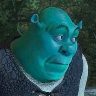

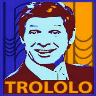

In [22]:
# Identify outliers
clean_set = []
clean_labels = []
# There are some faulty elements in the dataset

shrek = images[880] # Randomly selected Shrek in the dataset
r = shrek[ :, :, 0]
g = shrek[:, :, 1]
b = shrek[ :, :, 2]
rgb_image = cv2.merge((r, g, b)) # Merge the R,G,B channels
cv2_imshow(rgb_image)
print('\n')
troll = images[898] # Randomly selected Troll in the dataset
r = troll[ :, :, 0]
g = troll[:, :, 1]
b = troll[ :, :, 2]
rgb_image = cv2.merge((r, g, b)) # Merge the R,G,B channels
cv2_imshow(rgb_image) # Show

In [23]:
# Delete Outliers
for i in trange(images.shape[0]):
    # this check is to have a clean dataset
    if not np.array_equal(images[i], shrek) and not np.array_equal(images[i], troll):
        clean_set.append(images[i])
        clean_labels.append(labels[i])
        r = images[i, :, :, 0]
        g = images[i, :, :, 1]
        b = images[i, :, :, 2]
        rgb_image = cv2.merge((r, g, b))

100%|██████████| 5200/5200 [00:00<00:00, 12543.09it/s]


In [24]:
# Save clean_dataset
clean_set = np.array(clean_set)
clean_labels = np.array(clean_labels)
np.savez("/gdrive/My Drive/ANN Challenge 1/clean_dataset.npz",data=clean_set,labels=clean_labels)

In [25]:
# Load clean dataset
data = np.load("/gdrive/My Drive/ANN Challenge 1/clean_dataset.npz", allow_pickle=True)
images = data['data']
labels = data['labels']

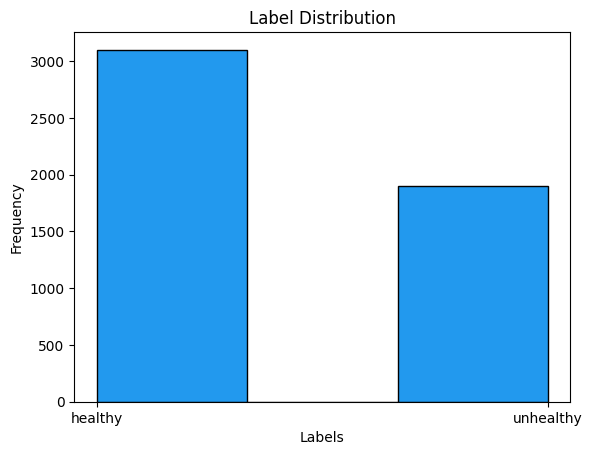

In [27]:
# Plot data distribution, after removing outliers
plt.hist(labels, bins=3, color='#2299ee', edgecolor='black')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.title('Label Distribution')
plt.show()